<h1>Capstone Project for Data Analysis</h1>

<h2>Group 2:</h2>

1. 2220401 - ADAM, Mukharil Bachtiar
2. 2210059 - KUBOTA, Natsumi
3. 2210420 - TANG, Wenhao

<h1>Data Acquisition</h1>

Importing data from twitter with keyword "Ukraine War". 

In [2]:
# for getting and process the data
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
import pandas as pd
import snscrape.modules.twitter as sntwitter

# for Data Understanding and Data Preprocessing
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import emoji
import contractions
import string
import seaborn as sns

# for Modelling Step
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# for SNA
from operator import itemgetter
import ast
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adambachtiar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adambachtiar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adambachtiar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def request_tweet():
    query = {"February": ["\"Ukraine War\" lang:en until:2022-02-28 since:2022-02-01", 30000],
             "March": ["\"Ukraine War\" lang:en until:2022-03-31 since:2022-03-01", 60000],
             "April": ["\"Ukraine War\" lang:en until:2022-04-30 since:2022-04-01", 90000],
             "May": ["\"Ukraine War\" lang:en until:2022-05-31 since:2022-05-01", 120000],
             "June": ["\"Ukraine War\" lang:en until:2022-06-30 since:2022-06-01", 150000],
             "July": ["\"Ukraine War\" lang:en until:2022-07-31 since:2022-07-01", 180000],
             "August": ["\"Ukraine War\" lang:en until:2022-08-31 since:2022-08-01", 210000],
             "September": ["\"Ukraine War\" lang:en until:2022-09-30 since:2022-09-01", 240000],
             "October": ["\"Ukraine War\" lang:en until:2022-10-31 since:2022-10-01", 270000],
             "November": ["\"Ukraine War\" lang:en until:2022-11-18 since:2022-11-01", 300000]}

    tweets = []
    limit = 50000

    for month in query.keys():
        for tweet in sntwitter.TwitterSearchScraper(query[month][0]).get_items():
    
            if len(tweets) == query[month][1]:
                break
            else:
                tweets.append([tweet.date, tweet.user.id, tweet.user.username, tweet.content, tweet.mentionedUsers, tweet.hashtags, tweet.retweetCount, tweet.place])
        
    df = pd.DataFrame(tweets, columns=['Date', 'IDUser', 'User', 'Tweet', 'MentionedUser', 'Hashtags', 'Retweet', 'Location'])
    print(df.head(10))

    return df

df = request_tweet()

In [3]:
def savedata_tocsv(dataframe, filepath):
    df.to_csv(filepath)

def access_file(filepath):
    return pd.read_csv(filepath, low_memory= False, header=0)

In [4]:
#savedata_tocsv(df, "./combined/resultukraine.csv")
df = access_file("./combined/resultukraine.csv")

In [5]:
df.tail(10)

,no,Date,IDUser,User,Tweet,MentionedUser,hashtags
300001,299990,2022-11-08 13:18:56+00:00,1572689833859874817,shihgal,10) Recession 2023.\n11) Small Business shut d...,NaN,NaN
300002,299991,2022-11-08 13:18:46+00:00,1046757072401043457,JosTeunissen2,3/world order.What we’ll end up with is yet mo...,NaN,NaN
300003,299992,2022-11-08 13:17:40+00:00,270100506,IanJSinclair,Useful summary from @peace_news of peace propo...,"[User(username='peace_news', id=327328717, dis...",NaN
300004,299993,2022-11-08 13:17:22+00:00,1405837522006122496,_IronManofIndia,@KremlinRussia_E don't underestimate west...\n...,"[User(username='KremlinRussia_E', id=205622130...",NaN
300005,299994,2022-11-08 13:17:10+00:00,93918083,Jalipa,Actually inflation started with Brexit- before...,NaN,NaN
300006,299995,2022-11-08 13:16:33+00:00,1204187974780542983,Doctor_Degen,"GM - In 1992 Soviet Union fell, at the time th...",NaN,NaN
300007,299996,2022-11-08 13:16:10+00:00,66672491,jeps2009,Russia-Ukraine war latest updates - The Washin...,"[User(username='googlenews', id=33584794, disp...",NaN
300008,299997,2022-11-08 13:16:05+00:00,105699495,mumtazg66,#Chess_Board\n♔ ♚♕ ♛♖ ♜♗ ♝♘ ♞♙\n#Ukraine_War_D...,NaN,"['Chess_Board', 'Ukraine_War_Day_257', 'Mayor'..."
300009,299998,2022-11-08 13:15:13+00:00,1517586610006597632,UncleBill_Not,"You, personally, started this global economic ...",NaN,NaN
300010,299999,2022-11-08 13:14:48+00:00,227650941,keith298,Mark Carney says Brexit has ‘slowed pace of ec...,NaN,NaN


# EDA

Before we do EDA, we will add "Month" and "Day" column

In [6]:
df["Month"] = df["Date"].str.slice(0,7)
df["Day"] = pd.to_datetime(df["Date"].str.slice(0,10))
df["Tweet"] = df["Tweet"].apply(str)
display(df.tail())

,no,Date,IDUser,User,Tweet,MentionedUser,hashtags,Month,Day
300006,299995,2022-11-08 13:16:33+00:00,1204187974780542983,Doctor_Degen,"GM - In 1992 Soviet Union fell, at the time th...",NaN,NaN,2022-11,2022-11-08
300007,299996,2022-11-08 13:16:10+00:00,66672491,jeps2009,Russia-Ukraine war latest updates - The Washin...,"[User(username='googlenews', id=33584794, disp...",NaN,2022-11,2022-11-08
300008,299997,2022-11-08 13:16:05+00:00,105699495,mumtazg66,#Chess_Board\n♔ ♚♕ ♛♖ ♜♗ ♝♘ ♞♙\n#Ukraine_War_D...,NaN,"['Chess_Board', 'Ukraine_War_Day_257', 'Mayor'...",2022-11,2022-11-08
300009,299998,2022-11-08 13:15:13+00:00,1517586610006597632,UncleBill_Not,"You, personally, started this global economic ...",NaN,NaN,2022-11,2022-11-08
300010,299999,2022-11-08 13:14:48+00:00,227650941,keith298,Mark Carney says Brexit has ‘slowed pace of ec...,NaN,NaN,2022-11,2022-11-08


1.  The overview of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300011 entries, 0 to 300010
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   no             300011 non-null  object        
 1   Date           300000 non-null  object        
 2   IDUser         300003 non-null  object        
 3   User           300000 non-null  object        
 4   Tweet          300011 non-null  object        
 5   MentionedUser  92197 non-null   object        
 6   hashtags       62838 non-null   object        
 7   Month          300000 non-null  object        
 8   Day            300000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 20.6+ MB


In [8]:
all_words = [word for tokens in df['Tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['Tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

48678880 words total, with a vocabulary size of 2851
Max tweet length is 997


2. The number of tweet feature

In [9]:
def tweetwith_rt(tweets):
    count = 0
    for tweet in tweets:
        if(re.search(r'RT\s+',str(tweet))!=None):
            count += 1
    
    return count

def tweetwith_username(tweets):
    count = 0
    for tweet in tweets:
        if(re.search(r'\B@\w+',str(tweet))!=None):
            count += 1
    
    return count

def tweetwith_url(tweets):
    count = 0
    for tweet in tweets:
        if(re.search(r'(http|https):\/\/\S+',str(tweet))!=None):
            count += 1
    
    return count

In [10]:
print("The number of tweets with RT: {}".format(tweetwith_rt(list(df['Tweet']))))
print("The number of tweets with Username: {}".format(tweetwith_username(list(df['Tweet']))))
print("The number of tweets with URL: {}".format(tweetwith_url(list(df['Tweet']))))

The number of tweets with RT: 750
The number of tweets with Username: 92925
The number of tweets with URL: 218973


3. The number of tweet per month

Adding the month column on dataframe:

In [11]:
def visualize_tweet_month(tweet_df):
    df_grouping = tweet_df.groupby(tweet_df["Month"])
    tweet_count = df_grouping["Tweet"].count()
    print(tweet_count)

In [12]:
visualize_tweet_month(df)

Month
2022-02    30000
2022-03    30000
2022-04    30000
2022-05    30000
2022-06    30000
2022-07    30000
2022-08    30000
2022-09    30000
2022-10    30000
2022-11    30000
Name: Tweet, dtype: int64


4. The number of Nan in each column

In [13]:
df.isna().sum().sort_values(ascending=False)

hashtags         237173
MentionedUser    207814
Date                 11
User                 11
Month                11
Day                  11
IDUser                8
no                    0
Tweet                 0
dtype: int64

5. Wordcloud without Stop Word.

In [17]:
def wordcloud_tweet(tweet_df):
    stopwords_set = set(STOPWORDS)
    wordcloud = WordCloud(background_color='white',
                          stopwords = stopwords_set,
                          max_words = 300,
                          max_font_size = 40,
                          scale = 2,
                          random_state=42
                         ).generate(str(tweet_df['Tweet']))

    print(wordcloud)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use

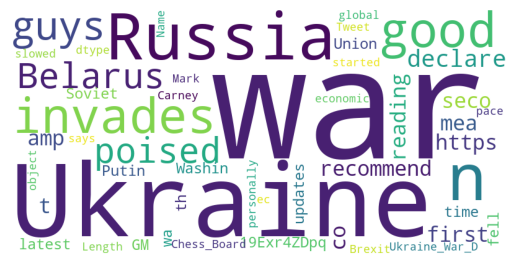

In [18]:
wordcloud_tweet(df)

In [19]:
def wordcloud_unique(tweet_df):
    unique_tweets = df.drop_duplicates(subset = ['Tweet'])
    stopwords_set = set(stopwords.words('english'))
    wordcloud= WordCloud(background_color = 'white',
                         stopwords=stopwords_set,
                         max_words=300,
                         max_font_size=40,
                         scale = 2,
                         random_state=42
                        ).generate(str(unique_tweets.iloc[:20]['Tweet']))
    print(wordcloud)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

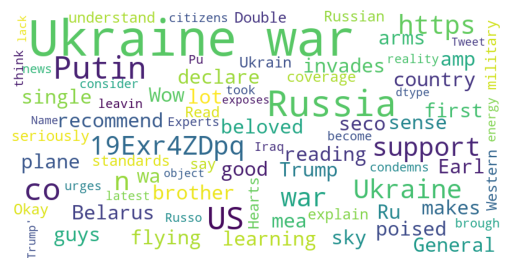

In [20]:
wordcloud_unique(df)

6. Tweets per day

In [21]:
def visualize_tweet_day(tweet_df):
    tweet_df["Month"] = tweet_df["Date"].str.slice(0,7)
    tweet_df["Day"] = pd.to_datetime(tweet_df["Date"].str.slice(0,10))
    df_grouping = tweet_df.groupby(tweet_df["Day"])
    tweet_count = df_grouping["Tweet"].count()
    print(tweet_count)

    plt.figure(figsize=(16,10))
    plt.plot(tweet_count.index,
             list(tweet_count))

    plt.title("Tweets per Month",fontsize=34)
    plt.ylabel("Number of tweets",fontsize=34)
    plt.xlabel("Month",fontsize=34)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.tight_layout()         
    plt.show()


Day
2022-02-24    3274
2022-02-25    9778
2022-02-26    8471
2022-02-27    8477
2022-03-25    1397
              ... 
2022-11-13    2365
2022-11-14    3079
2022-11-15    4337
2022-11-16    4199
2022-11-17    3544
Name: Tweet, Length: 98, dtype: int64


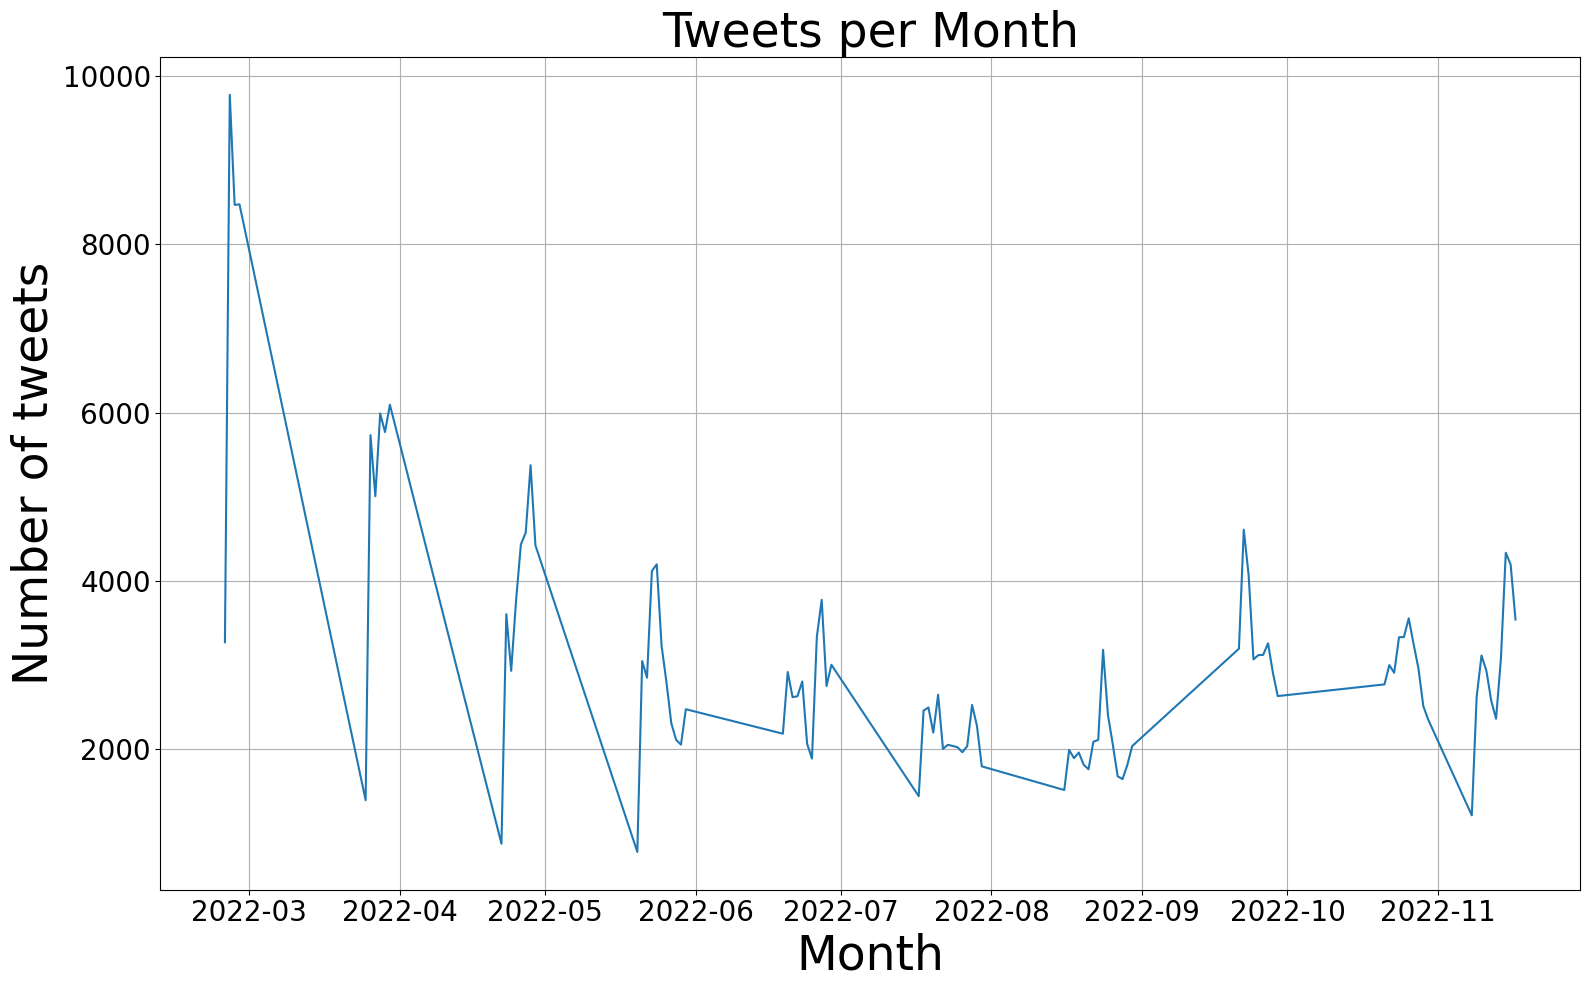

In [22]:
visualize_tweet_day(df)

7. Adding the number of words and char for each Tweet

In [23]:
num_chars = df.Tweet.apply(len)
num_words = df.Tweet.apply(lambda x: len(x.split()))
df['num_chars'] = num_chars
df['num_words'] = num_words

# Data Preprocessing

1. Delete unnecessary columns

In [24]:
df.drop(["no","Date","MentionedUser","hashtags"],axis=1,inplace=True)

2. Change Nan into appropriate value

In [25]:
df["Tweet"].fillna("")
print("Number of Nan in Tweets: {} ".format(df["Tweet"].isna().sum()))

Number of Nan in Tweets: 0 


3. Preprocessing all tweet feature and prepare token for each word in a tweet, such as:

1) Retweet (RT)
2) url
3) Username in tweet
4) Emoji
5) Uppercase to lowercase
6) Remove repetition in words and punctuation
7) Fix contraction

In [26]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def _fix_contractions(tweet):
    for k, v in contractions.contractions_dict.items():
        tweet = tweet.replace(k, v)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet


def custom_tokenize(tweet,
                    keep_punct=False,
                    keep_alnum=False,
                    keep_stop=False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

def stem_tokens(tokens, stemmer):
    token_list = []
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return token_list

def lemmatize_tokens(tokens, word_type, lemmatizer):
    token_list = []
    for token in tokens:
        token_list.append(lemmatizer.lemmatize(token, word_type[token]))
    return token_list

<>:2: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \B
<>:14: DeprecationWarning: invalid escape sequence \/
<>:2: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \B
<>:14: DeprecationWarning: invalid escape sequence \/
/var/folders/0l/vpv_sfks2_j173t14326hj240000gn/T/ipykernel_35805/2950818779.py:2: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('RT\s+', default_replace, tweet)
/var/folders/0l/vpv_sfks2_j173t14326hj240000gn/T/ipykernel_35805/2950818779.py:6: DeprecationWarning: invalid escape sequence \B
  tweet = re.sub('\B@\w+', default_replace, tweet)
/var/folders/0l/vpv_sfks2_j173t14326hj240000gn/T/ipykernel_35805/2950818779.py:14: DeprecationWarning: invalid escape sequence \/
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)


In [27]:
def process_tweet(tweet, verbose=False):
    if verbose: print("Initial tweet: {}".format(tweet))

    ## Twitter Features
    tweet = replace_retweet(tweet) # replace retweet
    tweet = replace_user(tweet, "") # replace user tag
    tweet = replace_url(tweet) # replace url
    tweet = replace_hashtag(tweet) # replace hashtag
    if verbose: print("Post Twitter processing tweet: {}".format(tweet))

    ## Word Features
    tweet = to_lowercase(tweet) # lower case
    tweet = fix_contractions(tweet) # replace contractions
    tweet = punct_repetition(tweet) # replace punctuation repetition
    tweet = word_repetition(tweet) # replace word repetition
    tweet = demojize(tweet) # replace emojis
    if verbose: print("Post Word processing tweet: {}".format(tweet))

    ## Tokenization & Stemming
    tokens1 = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
    stemmer = SnowballStemmer("english") # define stemmer
    stem = stem_tokens(tokens1, stemmer) # stem tokens

    return stem

In [28]:
list_tweet_preprocessed = []
# convert Tweet Series into list
list_tweet = df['Tweet'].to_list()

for tweet in list_tweet:
    list_tweet_preprocessed.append(process_tweet(tweet))

print(len(list_tweet_preprocessed))

300011


In [31]:
df["tokens"] = df["Tweet"].apply(process_tweet)

In [32]:
df.head()

,IDUser,User,Tweet,Month,Day,num_chars,num_words,tokens
0,282919637,erbantar1,"Russia invades, but there are no good guys in ...",2022-02,2022-02-27,85,13,"[russia, invad, good, guy, ukrain, war]"
1,1434301978566406153,DaveyBoyHarry,Ukraine war: Belarus poised to declare war as ...,2022-02,2022-02-27,133,20,"[ukrain, war, belarus, pois, declar, war, spec..."
2,4050704716,TheRoostergod,I recommend reading about the first &amp; seco...,2022-02,2022-02-27,268,41,"[recommend, read, first, amp, second, gulf, wa..."
3,1445203014134943744,BryantFikes,"So when the Ukraine war is over, does this mea...",2022-02,2022-02-27,138,25,"[ukrain, war, mean, left, go, back, border, ar..."
4,626944196,drjmcurtis,https://t.co/19Exr4ZDpq Putin's Ukraine War wa...,2022-02,2022-02-27,238,38,"[putin, ukrain, war, realli, attack, unit, sta..."


# LDA (Topic Modelling)

1. Make vectorization from the tweets

In [33]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [35]:
cv_vect = fit_cv(df["tokens"])
ft = cv_vect.get_feature_names_out()
print("There are {} features in this corpus".format(len(ft)))

There are 60519 features in this corpus


In [36]:
#create dictionary
text_dict = Dictionary(df.tokens)

#view integer mappings
text_dict.token2id

tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['tokens']]

In [37]:
print(tweets_bow[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(5, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(4, 1), (5, 1), (31, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(4, 2), (5, 1), (34, 1), (38, 1), (42, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 2), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1)], [(3, 1), (4, 1), (5, 1), (13, 1), (44, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(4, 1), (5, 2), (49, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 1), (82, 1)], [(3, 2), (4, 1), (5, 2), (52, 1), (62, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (

In [60]:
k = 10
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.029*"pay" + 0.024*"hai" + 0.022*"tax" + 0.020*"across" + 0.018*"main" + 0.016*"media" + 0.014*"launder" + 0.014*"type" + 0.013*"various" + 0.012*"money"'),
 (1,
  '0.072*"war" + 0.049*"articl" + 0.038*"crisi" + 0.030*"brexit" + 0.028*"iran" + 0.025*"today" + 0.024*"event" + 0.022*"list" + 0.021*"top" + 0.016*"read"'),
 (2,
  '0.108*"ukrain" + 0.105*"war" + 0.059*"kherson" + 0.048*"russia" + 0.048*"russian" + 0.038*"news" + 0.020*"ukrainian" + 0.018*"live" + 0.018*"kyiv" + 0.016*"soldier"'),
 (3,
  '0.077*"gt" + 0.038*"fund" + 0.029*"increas" + 0.028*"summit" + 0.026*"risk" + 0.023*"mark" + 0.023*"war" + 0.022*"pandem" + 0.019*"growth" + 0.017*"union"'),
 (4,
  '0.047*"inflat" + 0.046*"global" + 0.040*"war" + 0.038*"price" + 0.038*"energi" + 0.036*"econom" + 0.029*"ukrain" + 0.029*"ukrainenew" + 0.026*"oil" + 0.022*"economi"'),
 (5,
  '0.093*"war" + 0.079*"ukrain" + 0.057*"poland" + 0.046*"bbc" + 0.032*"water" + 0.031*"news" + 0.024*"al" + 0.022*"conflict" + 0.022*"climat" + 0

In [61]:
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
pyLDAvis.save_html(vis, 'index.html')

/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adambachtiar/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adamba

# Social Network Analysis

After knowing about the topic, we can also analyze the relationship between the topic using Social Network Analysis. Data was captured using CapstoneProjectDA.ipynb from Kaggle.com. 

1. Read the data

In [1]:
sna_df = pd.read_csv("./combined/concatresult.csv", index_col = [0], low_memory = True)
selection_language = sna_df['language'].str.contains("en", na=False)
tweet_en = sna_df[selection_language]
tweet_en

C:\Users\BAlif\AppData\Local\Temp\ipykernel_27028\3041098810.py:10: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  sna_df = pd.read_csv("./combined/concatresult.csv", index_col = [0], low_memory = True)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,802649176299466752,Emolclause,#TheResistance #ExpandTheCourt #EndTheFilibust...,NaN,91906,113262.0,91222,2016-11-26 23:04:10.000000,1498318245404762119,2022-02-28 15:24:41,2,"Very noteworthy however, that even he, Kremlin...","[{'text': 'Putin', 'indices': [82, 88]}]",en,NaN,0.0,2022-02-28 15:29:46.899785
2,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
6,3318106141,twilou200,NaN,NaN,1439,218.0,148527,2015-08-17 20:21:11.000000,1498318249116663808,2022-02-28 15:24:42,87,Belarus just renounced non-nuclear status and ...,[],en,NaN,0.0,2022-02-28 15:29:46.826676
7,941702641415000065,Dave24657469,NaN,NaN,1236,34.0,6001,2017-12-15 16:13:00.000000,1498318249657880579,2022-02-28 15:24:42,83,russian terrorists are firing 60 feet from the...,"[{'text': 'Kherson', 'indices': [103, 111]}, {...",en,NaN,0.0,2022-02-28 15:29:46.818605
8,4055064989,juha_t_harkonen,Idiootti isä. Reservin vanhus. SRA kouluttaja....,NaN,1478,370.0,25462,2015-10-27 18:08:07.000000,1498318250249265159,2022-02-28 15:24:42,27,russian helicopter landed in #Kharkiv region |...,"[{'text': 'Kharkiv', 'indices': [47, 55]}, {'t...",en,NaN,0.0,2022-02-28 15:29:46.810541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140376,1475841,sooooRob,"""Worry less about who you want to be and think...",San Francisco Bay Area,1469,415.0,7960.0,2007-03-19 06:09:50.000000,1498440720285253632.0,2022-02-28 23:31:22,1413.0,Can @POTUS arrange to have #Zelensky zoom into...,"[{'text': 'Zelensky', 'indices': [44, 53]}]",en,NaN,0.0,2022-02-28 23:32:03.529877
140377,17363943,ulle_schauws,Feministin 🚺 🏳️‍🌈 Grüne Bundestagsabgeordnete ...,"Krefeld, Nordrhein-Westfalen",3384,7929.0,9166.0,2008-11-13 12:29:30.000000,1498440720528683008.0,2022-02-28 23:31:22,81.0,"The situation in #Ukraine is changing rapidly,...","[{'text': 'Ukraine', 'indices': [33, 41]}]",en,NaN,0.0,2022-02-28 23:32:03.514988
140378,709334073278337024,rebeccaboltonuk,"Mostly here for the RHONY, RHOBH and RHOSLC chat",Manchester,158,104.0,3120.0,2016-03-14 11:03:16.000000,1498440720734109696.0,2022-02-28 23:31:22,4.0,A war where even librarians fight #UkraineRuss...,"[{'text': 'UkraineRussiaWar', 'indices': [53, ...",en,NaN,0.0,2022-02-28 23:32:03.500150
140379,17185461,cratylus,"Programmer interested in Philosophy,Maths and ...","Perth, Australia",661,955.0,13348.0,2008-11-05 09:20:13.000000,1498440721015078912.0,2022-02-28 23:31:22,9.0,✍️The fifth day of Russian Invasion - summary ...,[],en,NaN,0.0,2022-02-28 23:32:03.485217


In [2]:
tweet_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89600 entries, 0 to 140382
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          89600 non-null  object 
 1   username        89600 non-null  object 
 2   acctdesc        70731 non-null  object 
 3   location        54350 non-null  object 
 4   following       89600 non-null  object 
 5   followers       89600 non-null  float64
 6   totaltweets     89600 non-null  object 
 7   usercreatedts   89600 non-null  object 
 8   tweetid         89600 non-null  object 
 9   tweetcreatedts  89600 non-null  object 
 10  retweetcount    89600 non-null  object 
 11  text            89600 non-null  object 
 12  hashtags        89600 non-null  object 
 13  language        89600 non-null  object 
 14  coordinates     5 non-null      object 
 15  favorite_count  89600 non-null  float64
 16  extractedts     89600 non-null  object 
dtypes: float64(2), object(15)
memory us

2. Capture tag from hashtag structure

In [3]:
hashtags = []

for idx, i in enumerate(tweet_en.iloc[:,12:13].get("hashtags")):
    if isinstance(i, str) and i != '0':
        for j in ast.literal_eval(i):
            hashtag = {
                        "id" : tweet_en.iloc[idx]["tweetid"],
                        "tag": j.get("text")
                      }
            hashtags.append(hashtag)
hashtags_df = pd.DataFrame(hashtags)
hashtags_df

,id,tag
0,1498318245404762119,Putin
1,1498318245710995457,PS4
2,1498318245710995457,PS5
3,1498318245710995457,Ukraine
4,1498318245710995457,Russia
...,...,...
186393,1498440719522017280.0,Sweden
186394,1498440720285253632.0,Zelensky
186395,1498440720528683008.0,Ukraine
186396,1498440720734109696.0,UkraineRussiaWar


In [4]:
tweets_hashtag_df = hashtags_df.merge(sna_df, left_on='id', right_on='tweetid')
tweets_hashtag_df.head()

,id,tag,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1498318245404762119,Putin,802649176299466752,Emolclause,#TheResistance #ExpandTheCourt #EndTheFilibust...,NaN,91906,113262.0,91222,2016-11-26 23:04:10.000000,1498318245404762119,2022-02-28 15:24:41,2,"Very noteworthy however, that even he, Kremlin...","[{'text': 'Putin', 'indices': [82, 88]}]",en,NaN,0.0,2022-02-28 15:29:46.899785
1,1498318245710995457,PS4,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
2,1498318245710995457,PS5,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
3,1498318245710995457,Ukraine,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
4,1498318245710995457,Russia,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193


In [5]:
merged_df = tweets_hashtag_df.rename(columns={"username": "username", "tag": "target"})
merged_df = merged_df[["username", "target", "text"]]
merged_df = merged_df.drop_duplicates(keep= 'first', ignore_index=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182075 entries, 0 to 182074
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  182075 non-null  object
 1   target    182075 non-null  object
 2   text      182075 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


3. Making graph to draw connection between the topic

In [22]:
graph = nx.Graph()
graph = nx.from_pandas_edgelist(merged_df[:100], 'username', 'target')

# Number of Nodes, Edges, Density, Connected Components
print('Jumlah nodes', nx.number_of_nodes(graph))
print('Jumlah edges', nx.number_of_edges(graph))
print('Density', nx.density(graph))
print('Jumlah connected component', nx.number_connected_components(graph))

Jumlah nodes 87
Jumlah edges 100
Density 0.02673082063619353
Jumlah connected component 3


4. Calculate Degree of Centrality

In [10]:
nx.degree_centrality(graph)

{'Emolclause': 4.621285641665511e-05,
 'Putin': 0.08780442719164472,
 'shobshosuka': 6.161714188887348e-05,
 'PS4': 1.540428547221837e-05,
 'PS5': 3.080857094443674e-05,
 'Ukraine': 0.48435694810296226,
 'Russia': 0.20615555247469847,
 'Dave24657469': 3.080857094443674e-05,
 'Kherson': 0.0012323428377774698,
 'juha_t_harkonen': 6.161714188887348e-05,
 'Kharkiv': 0.027080733860159897,
 'russiaukrainewar': 0.0058690327649151995,
 'JohnPollux2792': 3.080857094443674e-05,
 'polak_pot': 6.161714188887348e-05,
 'Moscow': 0.008765038433692253,
 'DeepDarkRock': 4.621285641665511e-05,
 'ABCHAMP11': 6.161714188887348e-05,
 'Belarus': 0.011337554107552722,
 'IIHF': 0.0009704699847497574,
 'ukasz38973162': 6.161714188887348e-05,
 'Berdyansk': 0.002249025678943882,
 'ZanP': 4.621285641665511e-05,
 'China': 0.006731672751359428,
 'OddoYEAH': 1.540428547221837e-05,
 'Denmark': 0.0010012785556941942,
 'EdwardL30161051': 4.621285641665511e-05,
 'Kyiv': 0.06856447463684397,
 'Ukrainian': 0.0159126268928

In [11]:
sorted(nx.degree_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:10]

[('Ukraine', 0.48435694810296226),
 ('Russia', 0.20615555247469847),
 ('Putin', 0.08780442719164472),
 ('UkraineRussiaWar', 0.07800730163131384),
 ('Kyiv', 0.06856447463684397),
 ('Russian', 0.048354052097293466),
 ('EU', 0.04182263505707288),
 ('ukraine', 0.027542862424326447),
 ('Kharkiv', 0.027080733860159897),
 ('NATO', 0.023322088204938612)]

5. Calculate Betweeness Centrality

In [ ]:
nx.betweenness_centrality(graph)

In [ ]:
sorted(nx.betweenness_centrality(graph).items(), key=lambda x:x[1], reverse=True)[0:10]

6. Calculate Closeness Centrality

In [51]:
nx.closeness_centrality(graph)

{'Emolclause': 0.24509732448786178,
 'Putin': 0.2874487004103967,
 'shobshosuka': 0.29728534795295786,
 'PS4': 0.2272850189291509,
 'PS5': 0.2272850189291509,
 'Ukraine': 0.3459559580160527,
 'Russia': 0.3553911205073996,
 'Dave24657469': 0.2563476934807472,
 'Kherson': 0.2025545246415231,
 'juha_t_harkonen': 0.2995633965962755,
 'Kharkiv': 0.2299589603283174,
 'russiaukrainewar': 0.2286141710866313,
 'JohnPollux2792': 0.2885093967218742,
 'polak_pot': 0.011627906976744186,
 'Moscow': 0.011627906976744186,
 'DeepDarkRock': 0.259754307347601,
 'ABCHAMP11': 0.263252681857333,
 'Belarus': 0.2068413928879045,
 'IIHF': 0.2068413928879045,
 'ukasz38973162': 0.29504168494953925,
 'Berdyansk': 0.2272850189291509,
 'ZanP': 0.29504168494953925,
 'China': 0.2259712326925662,
 'OddoYEAH': 0.011627906976744186,
 'Denmark': 0.011627906976744186,
 'EdwardL30161051': 0.2580397574641185,
 'Kyiv': 0.203609496124031,
 'Ukrainian': 0.203609496124031,
 'UkraineLIVEINF1': 0.22275226926389718,
 'Macron': 0.1

In [52]:
sorted(nx.closeness_centrality(graph).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Russia', 0.3553911205073996),
 ('Ukraine', 0.3459559580160527),
 ('khasia_irakli', 0.3191267204556241),
 ('ferozwala', 0.31149819327341793),
 ('nmkhonto81', 0.30903575696295615),
 ('Jsrod4', 0.3018766274580228),
 ('juha_t_harkonen', 0.2995633965962755),
 ('shobshosuka', 0.29728534795295786),
 ('ukasz38973162', 0.29504168494953925),
 ('ZanP', 0.29504168494953925)]

7. Calculate Eigenvector Centrality

In [53]:
nx.eigenvector_centrality(graph)

{'Emolclause': 0.021616984764359918,
 'Putin': 0.062099570638645116,
 'shobshosuka': 0.19601068431940388,
 'PS4': 0.03747070024102697,
 'PS5': 0.03747070024102697,
 'Ukraine': 0.4469649687100667,
 'Russia': 0.5034442926913584,
 'Dave24657469': 0.08868509387616247,
 'Kherson': 0.01695371477557542,
 'juha_t_harkonen': 0.1963042420049661,
 'Kharkiv': 0.03895022013187347,
 'russiaukrainewar': 0.03752681812476245,
 'JohnPollux2792': 0.0973164773043633,
 'polak_pot': 8.86666971624536e-16,
 'Moscow': 8.86666971624536e-16,
 'DeepDarkRock': 0.09624044122043976,
 'ABCHAMP11': 0.10382905902287357,
 'Belarus': 0.01984855874697791,
 'IIHF': 0.01984855874697791,
 'ukasz38973162': 0.19601068431933033,
 'Berdyansk': 0.07494140048194985,
 'ZanP': 0.18857592947979987,
 'China': 0.03604942670501313,
 'OddoYEAH': 8.86666971624536e-16,
 'Denmark': 8.86666971624536e-16,
 'EdwardL30161051': 0.09218162529678159,
 'Kyiv': 0.017622141494226723,
 'Ukrainian': 0.017622141494226723,
 'UkraineLIVEINF1': 0.012322859

In [54]:
sorted(nx.eigenvector_centrality(graph).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Russia', 0.5034442926913584),
 ('Ukraine', 0.4469649687100667),
 ('ferozwala', 0.21411286369979024),
 ('Jsrod4', 0.21278944845519987),
 ('khasia_irakli', 0.19721086821281594),
 ('juha_t_harkonen', 0.1963042420049661),
 ('shobshosuka', 0.19601068431940388),
 ('ukasz38973162', 0.19601068431933033),
 ('AnthonyWapow', 0.19601068431933033),
 ('ZanP', 0.18857592947979987)]

8. Draw the SNA graph

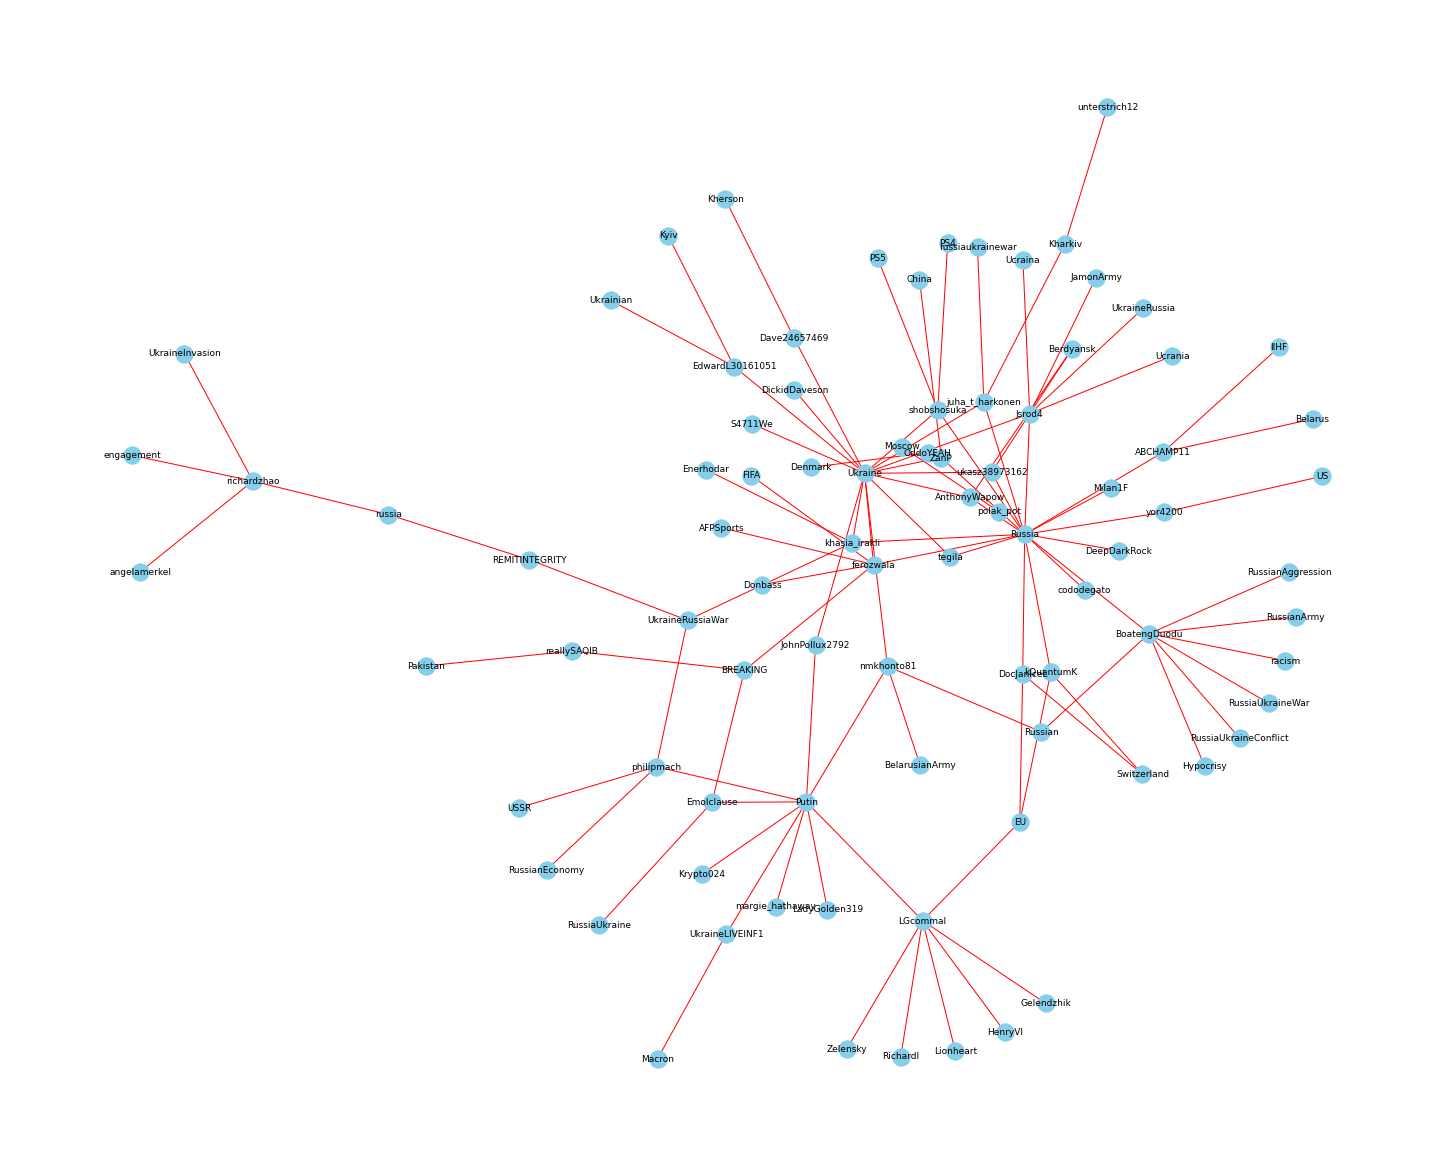

In [11]:
plt.figure(figsize=(20,16))
nx.draw(
    graph, 
    with_labels =True,
    node_color='skyblue',
    edge_color='red',
    font_size=9,
    pos=nx.kamada_kawai_layout(graph)
)

['Russia', 'Ukraine', 'Putin', 'BoatengDuodu', 'LGcommaI']

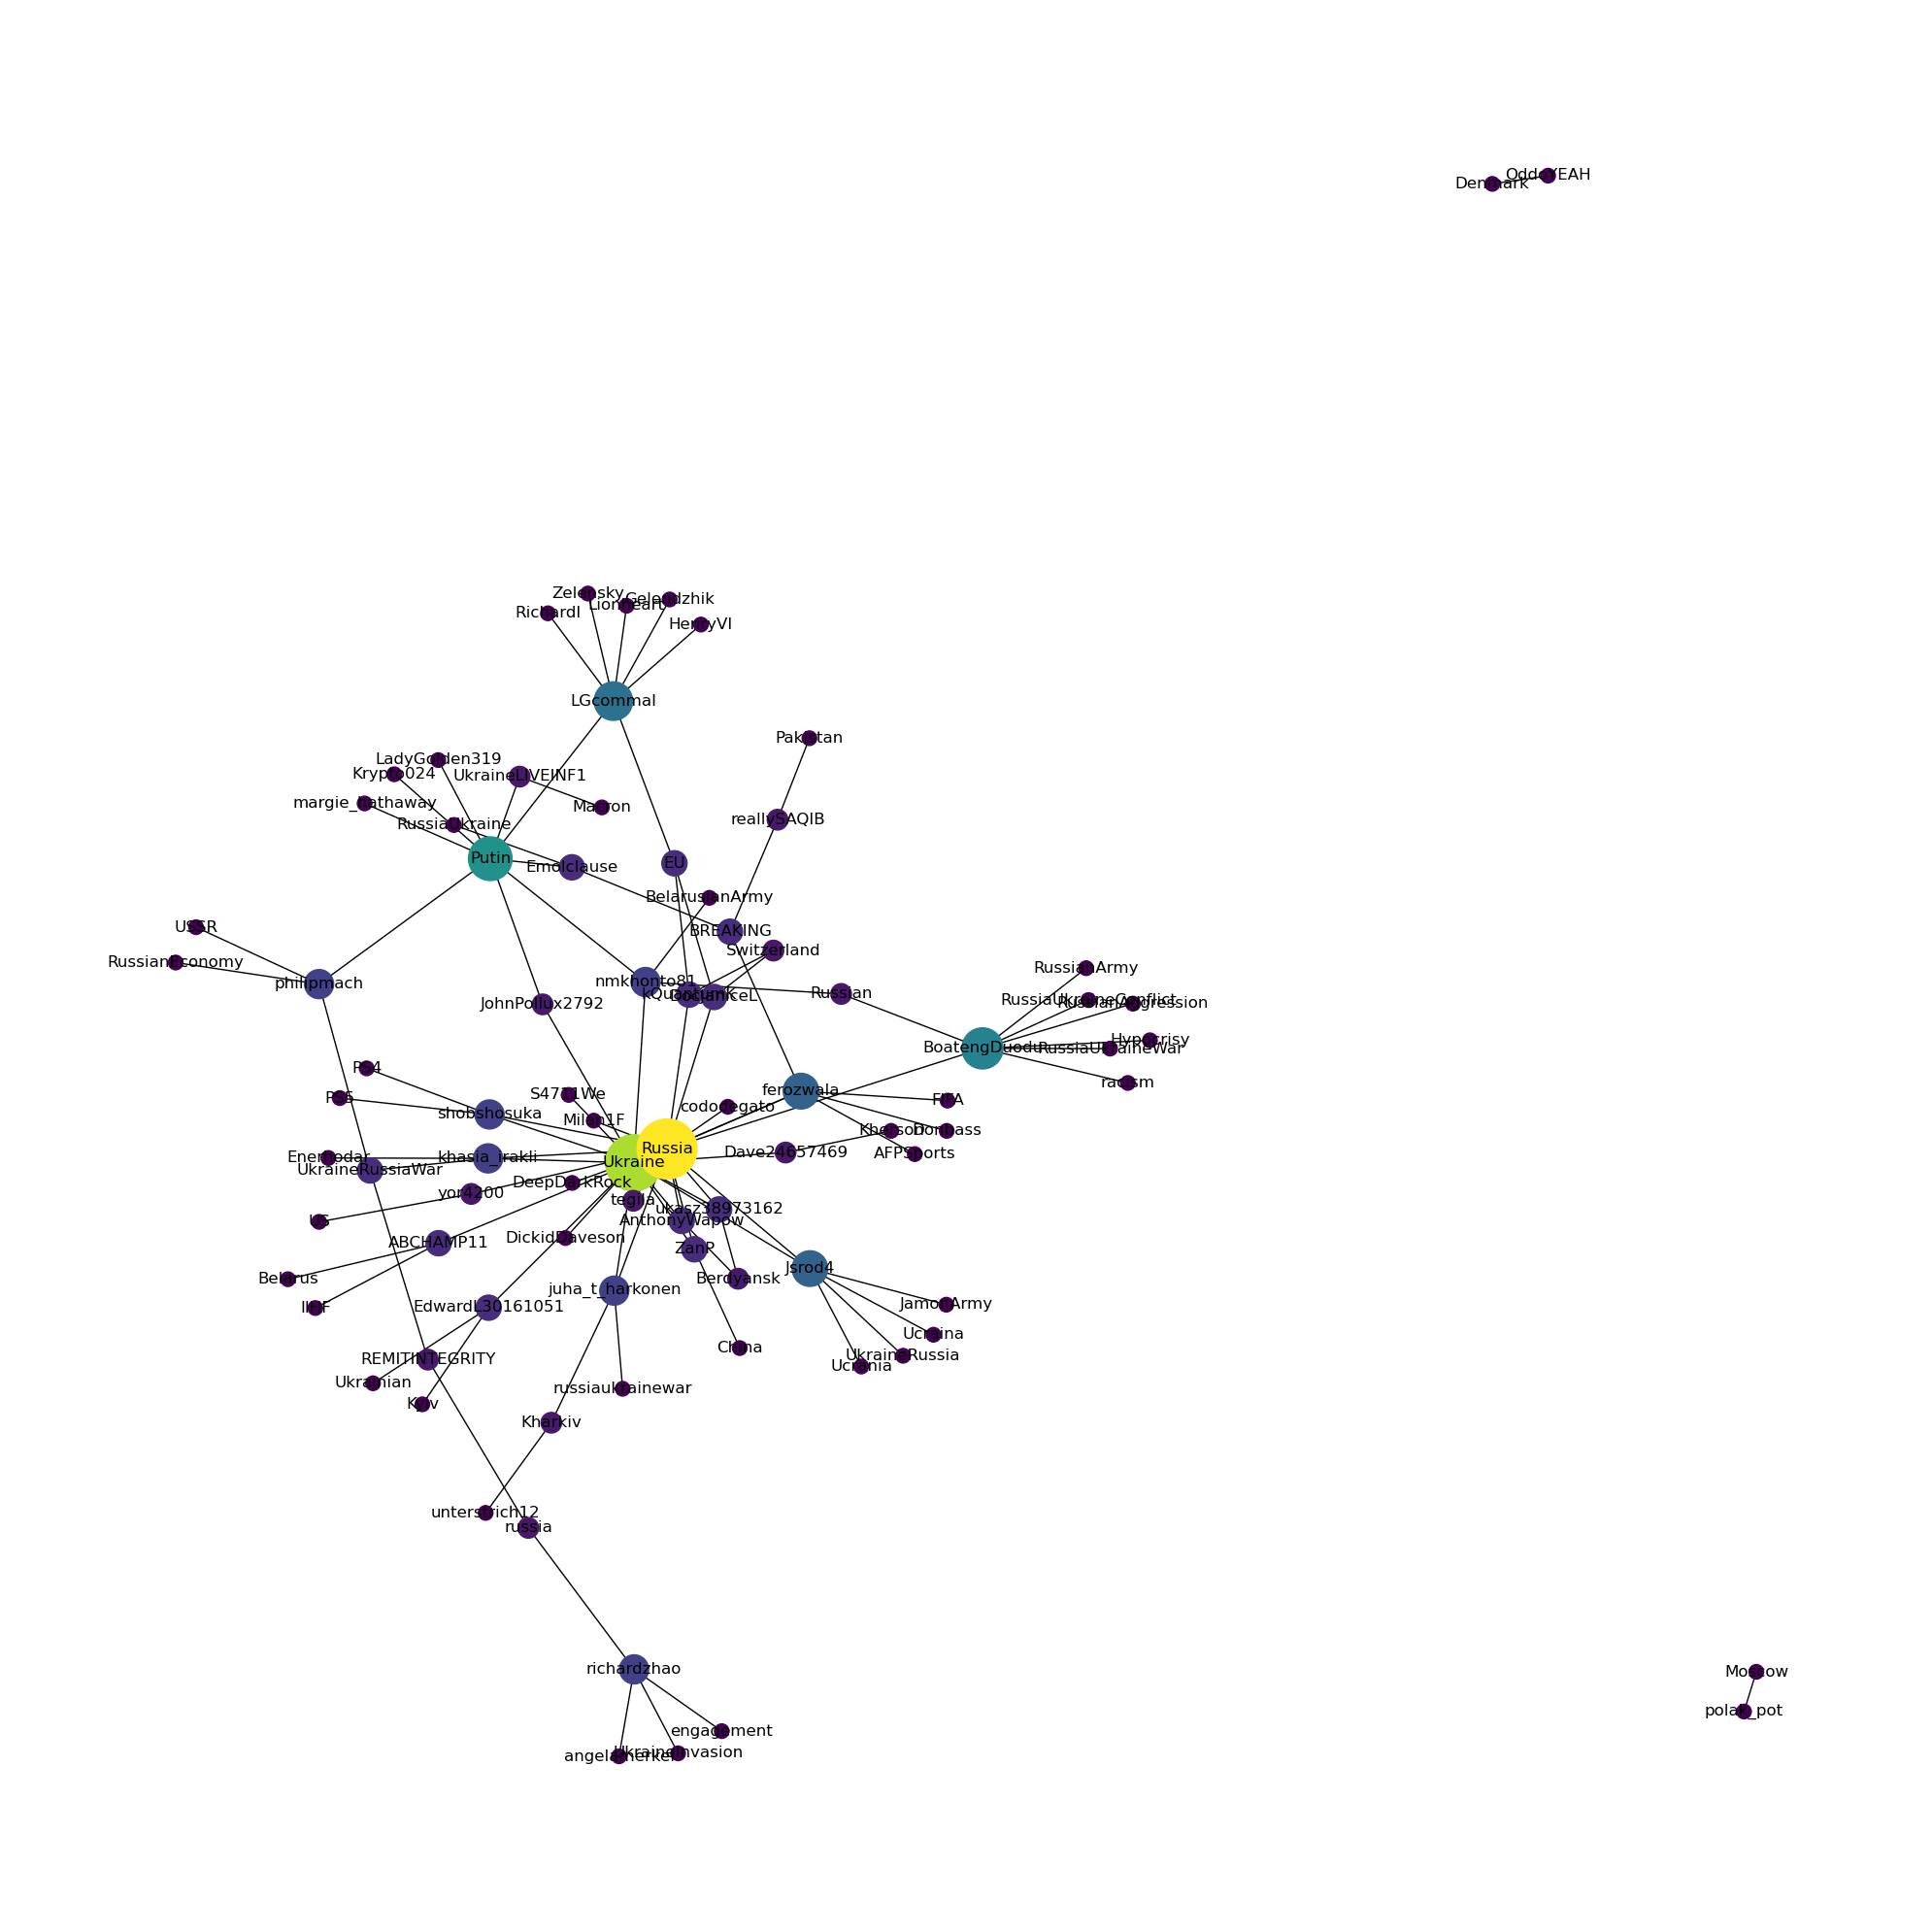

In [56]:
pos = nx.spring_layout(graph)
betCent = nx.degree_centrality(graph)
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.tight_layout()

sorted(betCent, key=betCent.get, reverse=True)[:5]

['Russia', 'Ukraine', 'Putin', 'khasia_irakli', 'UkraineRussiaWar']

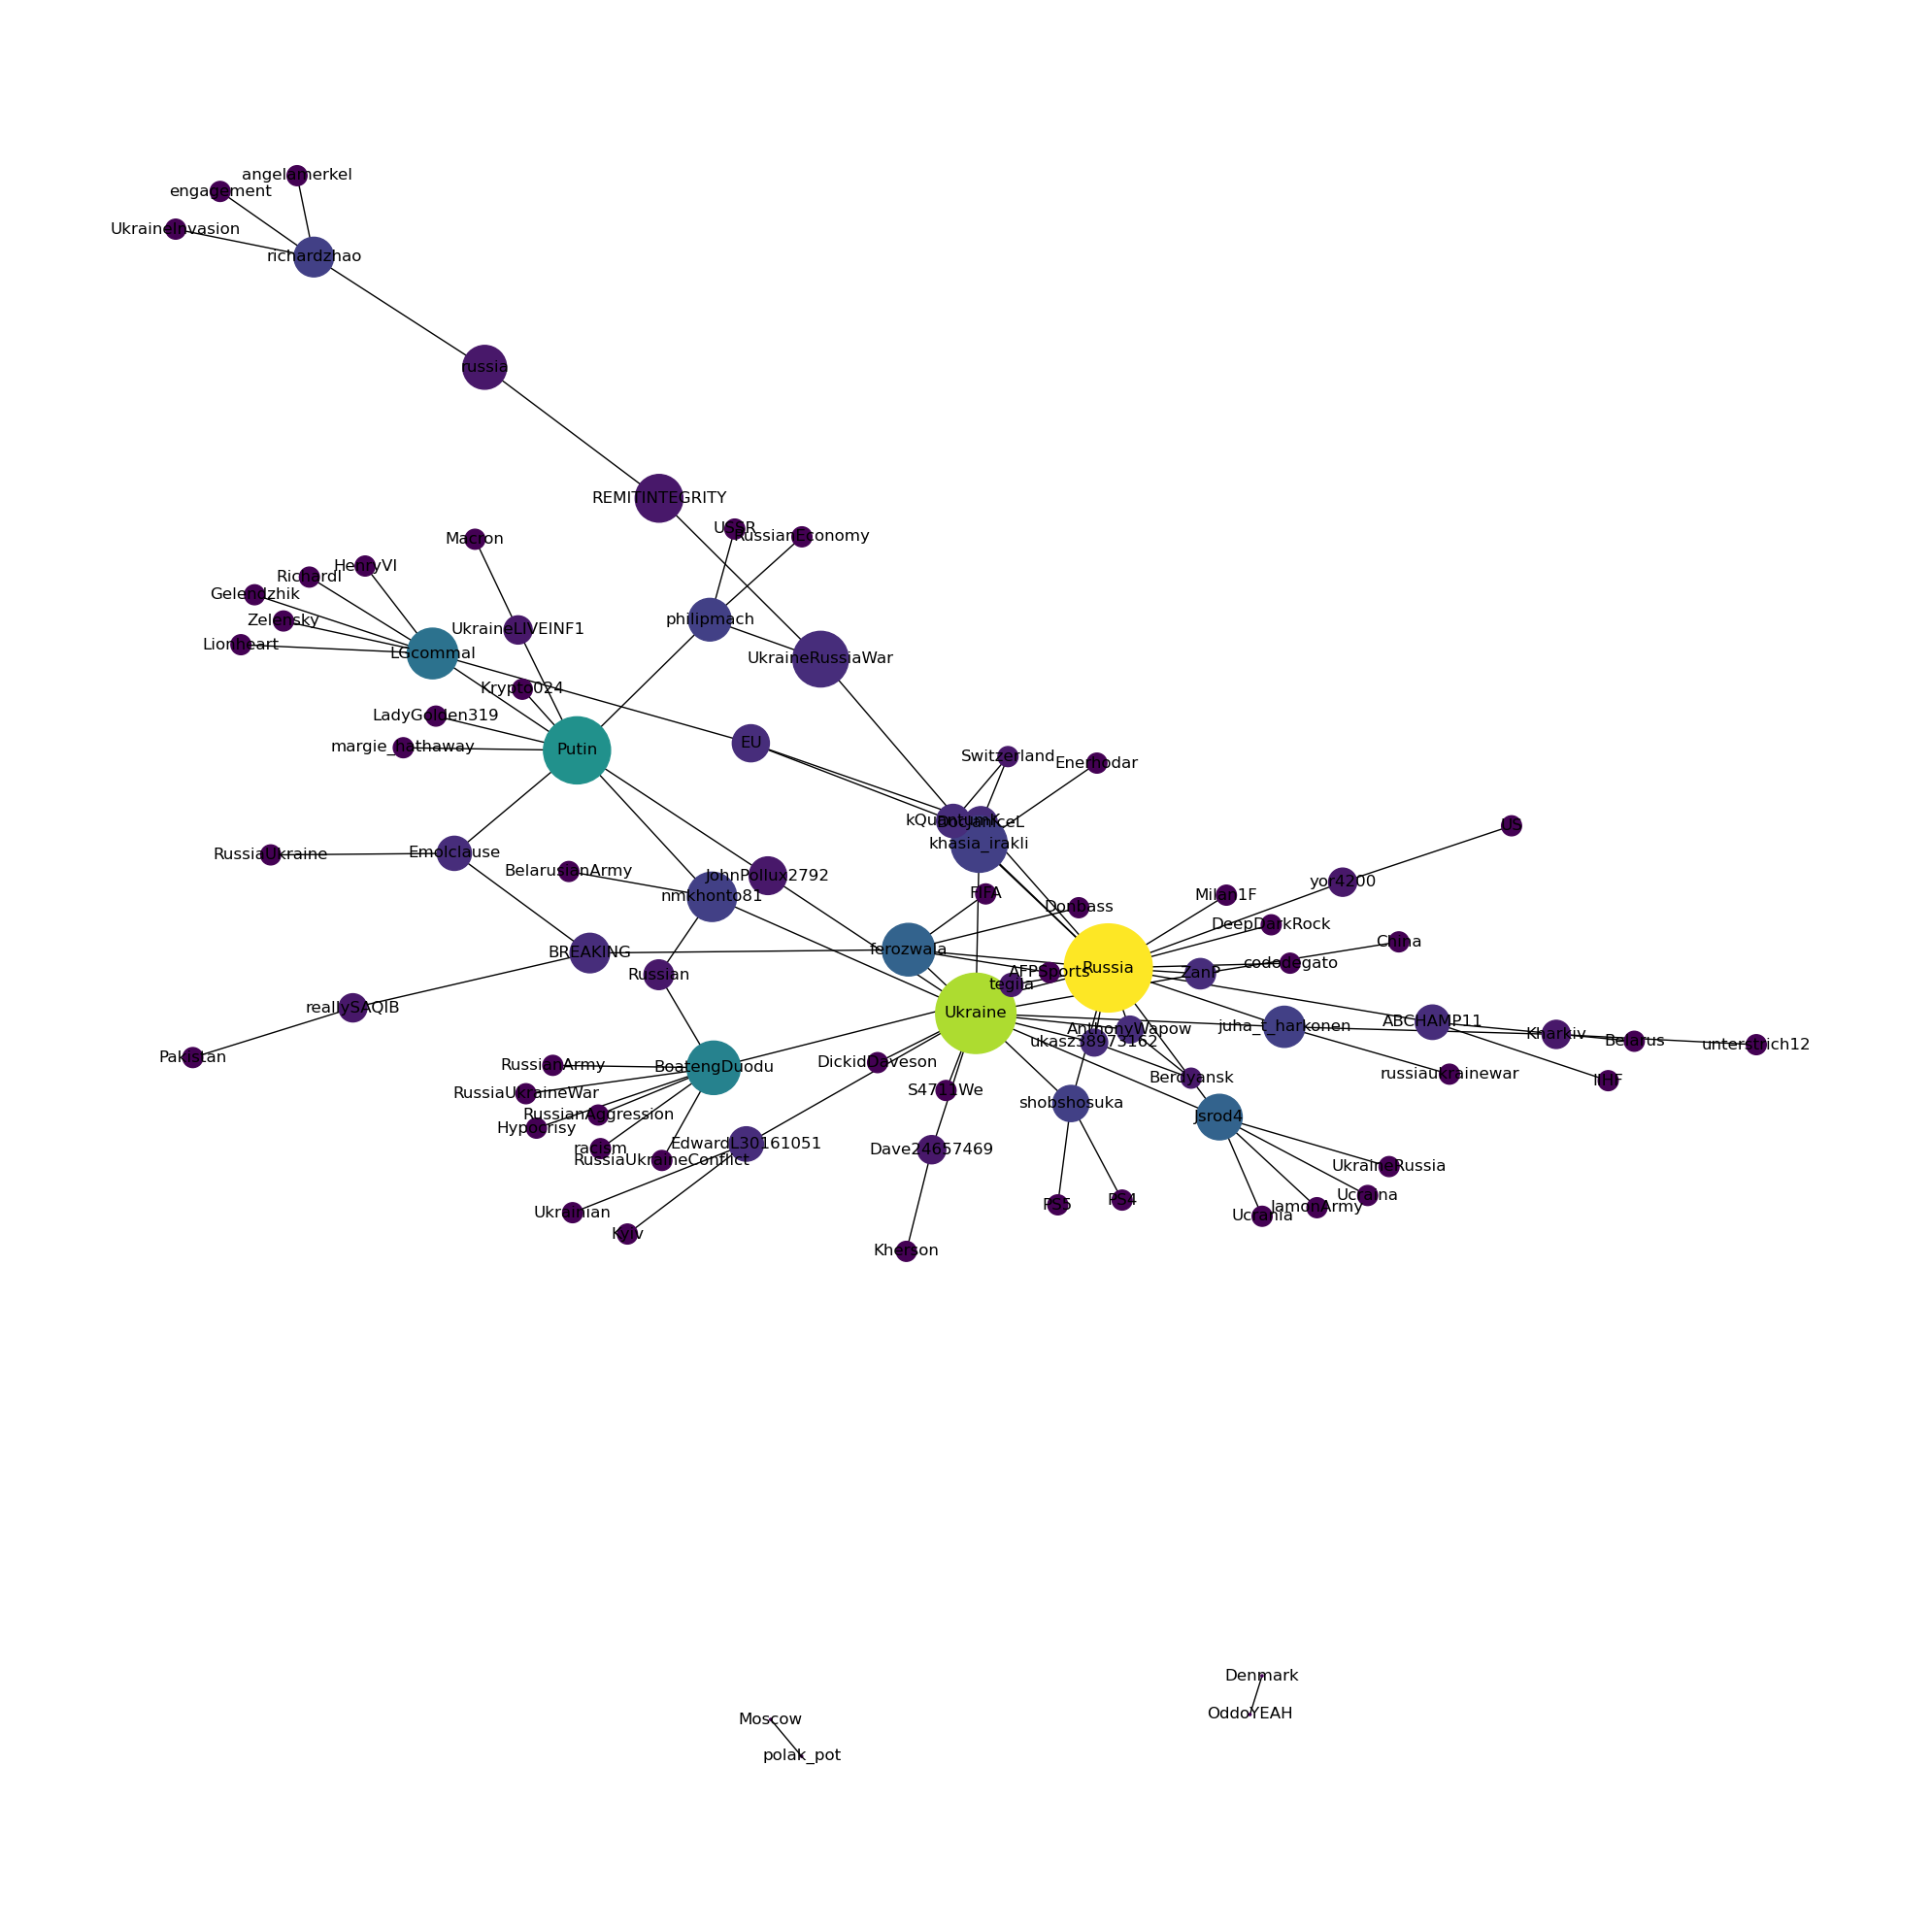

In [57]:
pos = nx.spring_layout(graph)
betCent = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.tight_layout()

sorted(betCent, key=betCent.get, reverse=True)[:5]

['Russia', 'Ukraine', 'khasia_irakli', 'ferozwala', 'nmkhonto81']

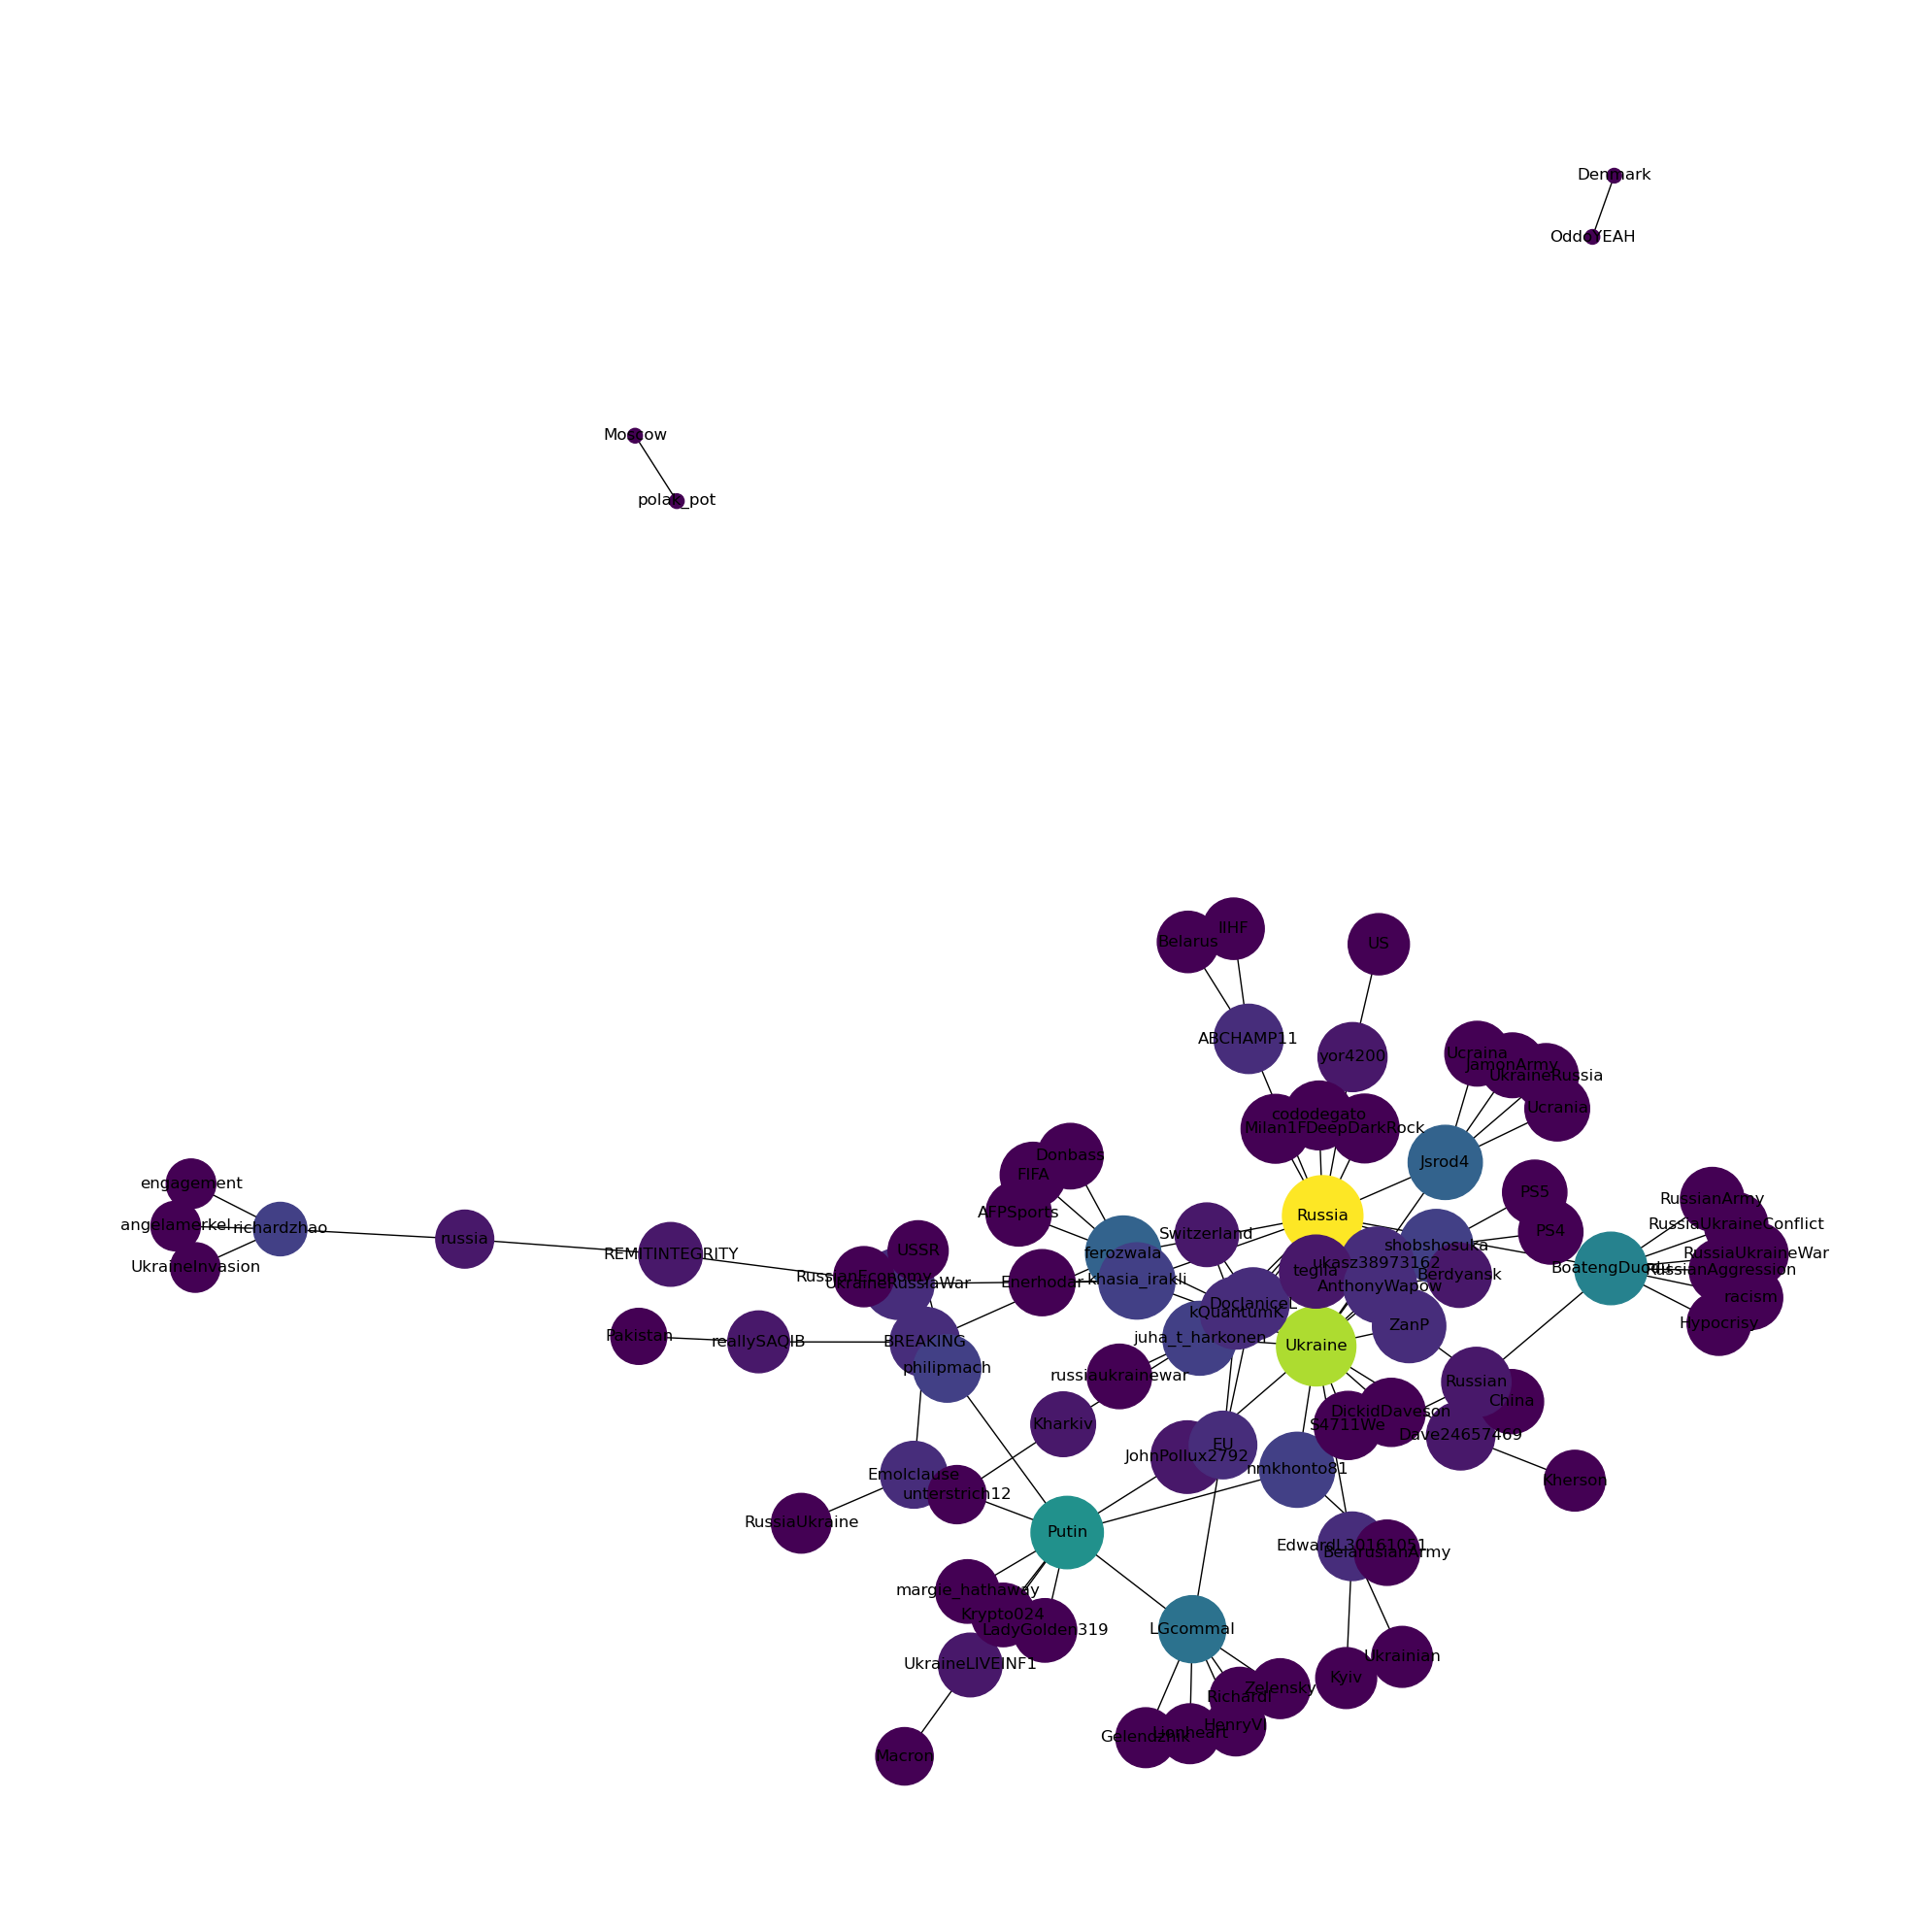

In [58]:
pos = nx.spring_layout(graph)
betCent = nx.closeness_centrality(graph)
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')
plt.tight_layout()

sorted(betCent, key=betCent.get, reverse=True)[:5]

['Russia', 'Ukraine', 'ferozwala', 'Jsrod4', 'khasia_irakli']

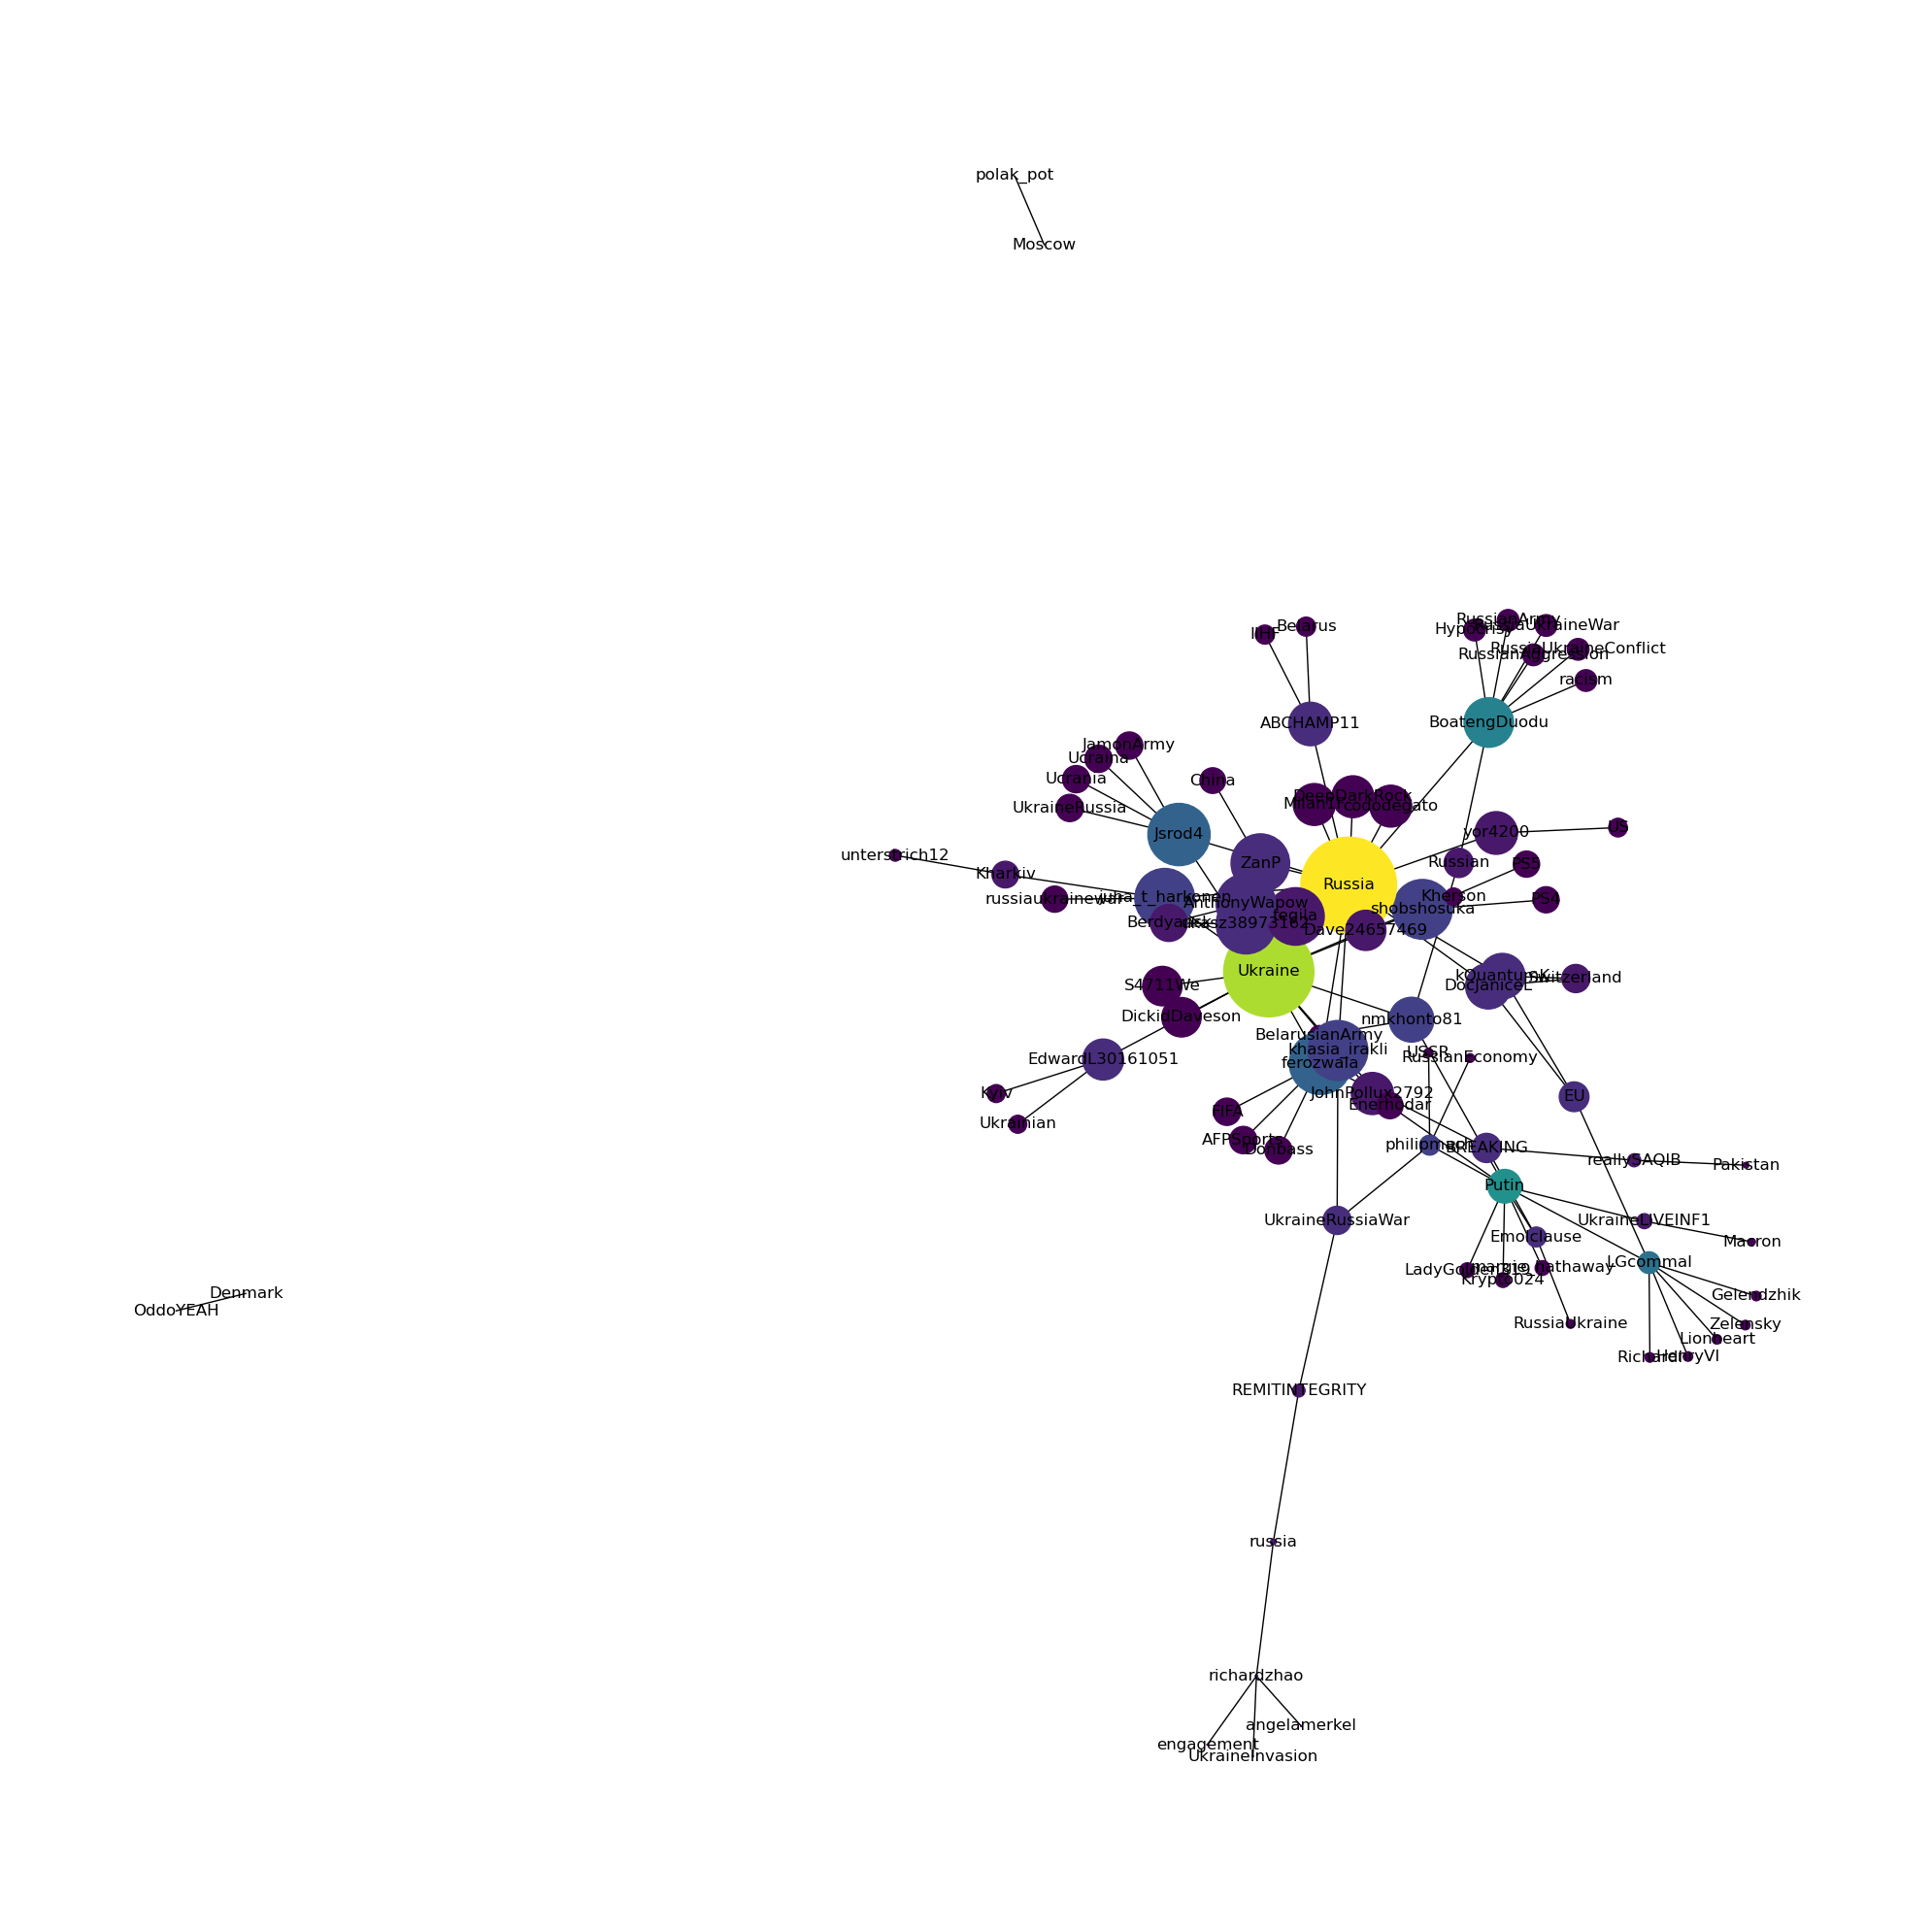

In [59]:
pos = nx.spring_layout(graph)
betCent = nx.eigenvector_centrality(graph)
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')
plt.tight_layout()

sorted(betCent, key=betCent.get, reverse=True)[:5]

9. Make an Interactive Network Visualization with Bokeh

https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html

In [17]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [23]:
degrees = dict(nx.degree(graph))
nx.set_node_attributes(graph, name='degree', values=degrees)

In [24]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(graph)])
nx.set_node_attributes(graph, name='adjusted_node_size', values=adjusted_node_size)

In [25]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Network Visualization'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Username", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(graph, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

## Remove deprecation warning
Put it on top of the file

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 